# This notebook compares different explorative algorithms in terms of $L_2$ and $L_\infty$ learning regrets.

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc

from InfoGrad import InfoGrad
from IPython.display import HTML

import pickle as pkl

%load_ext autoreload
%autoreload 2

In [2]:
# The underlying function
def f(X,Y):
    return -(np.exp(-2*(X+1.5)**2 - 0.3*(Y+1.5)**2-0.3*X*Y+0.4)+np.exp(-(X-0.5)**2 - (Y-1.2)**2-0.6*X*Y)+np.exp(-0.7*(X-1.5)**2 - 0.3*(Y+1.5)**2-0.*X*Y))


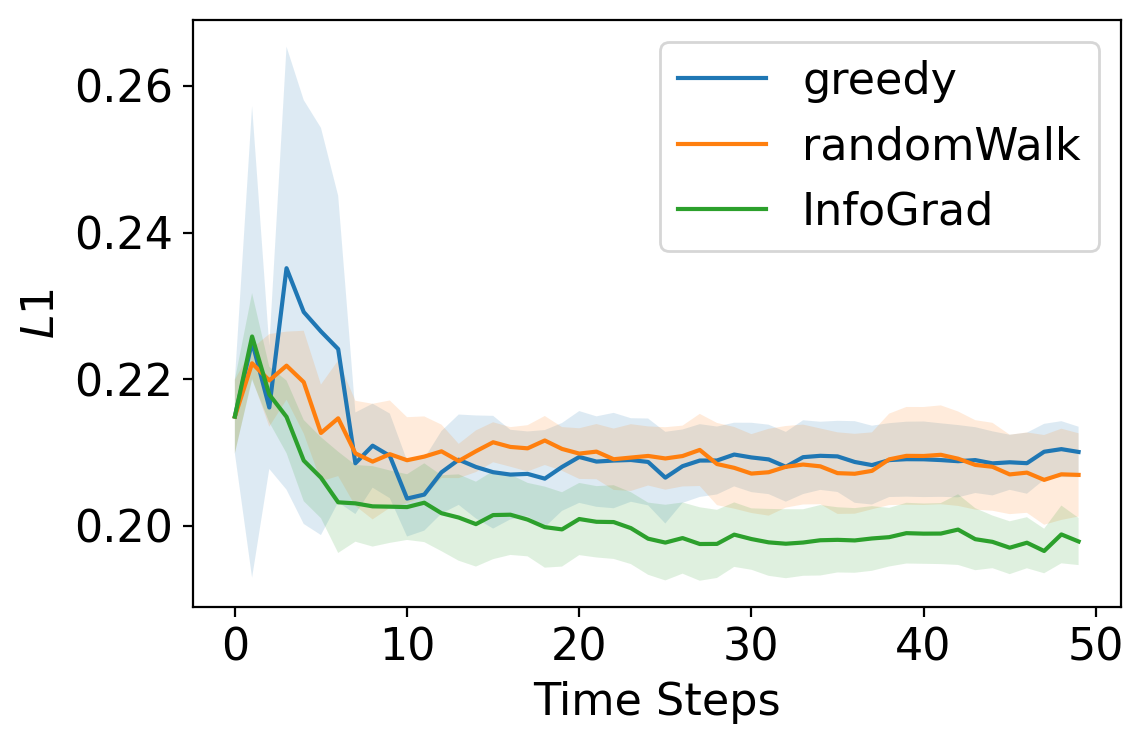

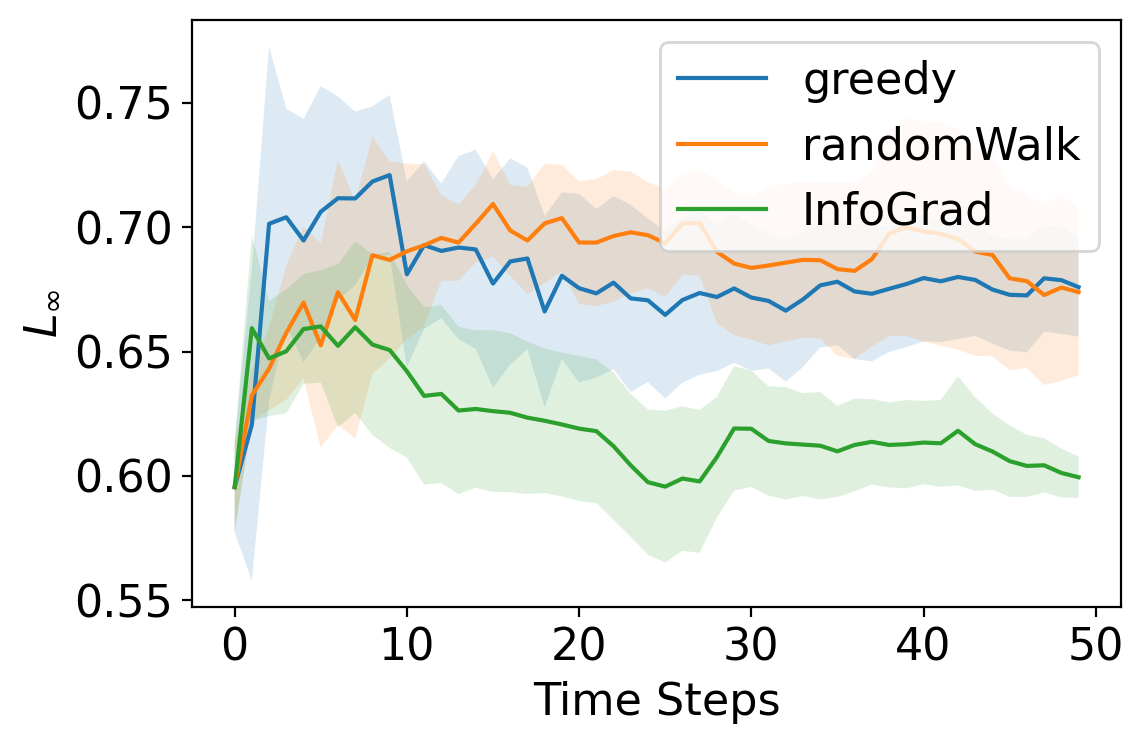

In [4]:
metrics = {r'$L1$':np.mean,r'$L_{\infty}$':np.max}
rc('font',size=16)
for loss_name,loss in metrics.items():

    plt.figure(dpi=200)
    for mode in ['greedy','randomWalk','InfoGrad']:
        with open('{}2D-REP.pkl'.format(mode),'rb') as file:
            data = pkl.load(file)

        xlist = np.linspace(-2.0, 2.0, 100)
        ylist = np.linspace(-2.0, 2.0, 100)
        full_X,full_Y = np.meshgrid(xlist, ylist)

        true_z = f(full_X,full_Y)

        # np.linalg.norm(true_z-data['mu_hist'][0].reshape(full_X.shape))

        diff = np.abs(true_z.flatten() - np.array(data['mu_hist']))


    #     loss = np.max
        L = loss(diff,axis=-1)

        mu_L = np.mean(L,axis = 0)
        std_L = np.std(L,axis = 0)

        plt.plot(mu_L,label = mode)
        plt.fill_between(range(len(mu_L)),mu_L+std_L*0.5,mu_L-std_L*0.5,alpha = 0.15)
    plt.ylabel(loss_name)
    plt.xlabel('Time Steps')


    plt.legend()
    plt.tight_layout()
    
    plt.savefig('loss_{}.png'.format(loss_name))